In [19]:
import numpy as np
import pandas as pd

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN房屋所在镇非零售区域所占比例
* CHAS 房屋在河边为1，否则为0
* NOX 一氧化氮浓度
* RM平均房间数量
* AGE1940年前建成房屋所占比例
* DIS房屋距离波士顿五大就业中心的加权距离
* RAD距离房屋最近的公路
* TAX财产税额度
* PTRATIO房屋所在镇师生比例
* B 100 * （房屋所在镇非美籍人口所占比例 - 0.63） *2
* LSTAT弱势人口所占比例
* MEDV 房屋的平均价格

In [26]:
data = pd.read_csv(r"boston.csv")
data.duplicated().any()

False

In [77]:
#最小二乘法实现线性回归。（最小二乘法）
class LinerRgression:

    
    def fit(self,X,y):
        #如果X是数组对象的一部分，而不是完整的对象数据（例如：X是由其他对象通过切片传递过来的
        #则无法完成矩阵的转换
        #这里创建X的拷贝对象，避免转换矩阵时失败
        X = np.asmatrix(X.copy())
        #y是一位结构（行向量或列向量），以为结构可以不用拷贝
        #注意：一维转矩阵 转为一列多行
        y = np.asmatrix(y).reshape(-1,1)
        #通过最小二乘公式，求解出最佳的权重值
        self.w = (X.T * X).I * X.T * y

    def predict(self,X):
        '''对样本数据进行预测
        Parameters
        X：特征矩阵 待预测的样本特征

        Returns：数组类型 预测结果

        '''
        #将X转换成矩阵，注意对X进行拷贝
        X = np.asmatrix(X.copy())
        result = X * self.w
        #将矩阵转换成ndarray数据，进行扁平化处理
        return np.array(result).ravel()

In [87]:
 #不考虑截距
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr = LinerRgression()
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))
display(lr.w)

17.01190553363402

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [107]:
#考虑结局，增加一列，该列的所有值都是1
t = data.sample(len(data),random_state=0)
#按照习惯，截距作为w0 我们为之配上一个x0 x0放在最前面
new_columns = t.columns.insert(0,"Intercepts")
t = t.reindex(columns = new_columns,fill_value=1)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr = LinerRgression()
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))

17.09753138466743

In [127]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarn

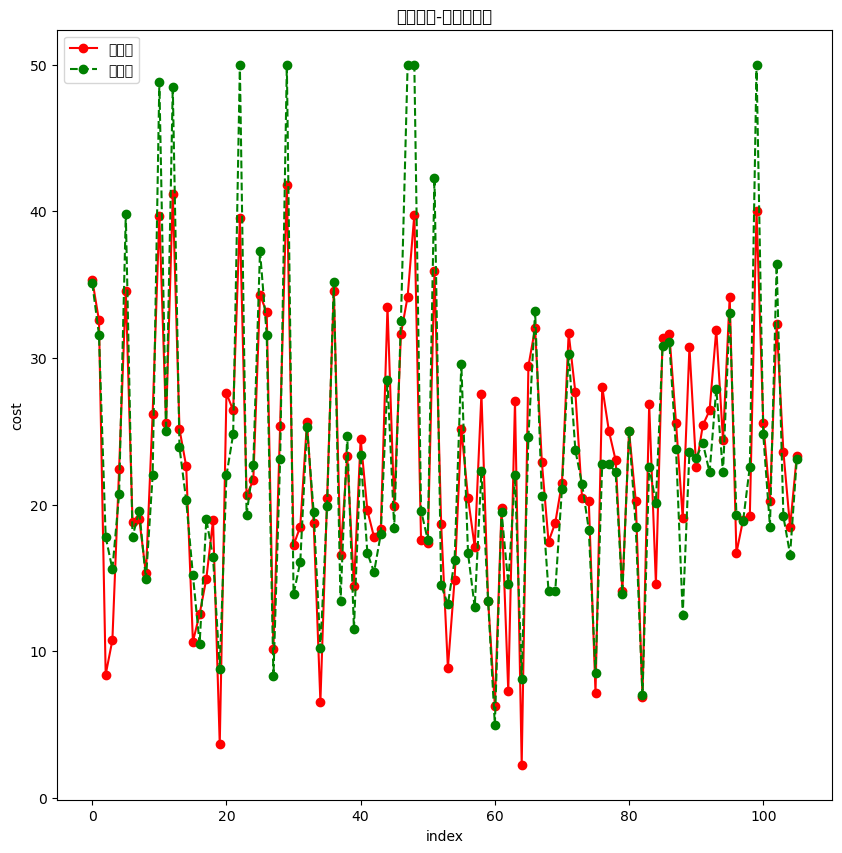

In [129]:
plt.figure(figsize=(10,10))
#预测值
plt.plot(result,"ro-",label="预测值")
#真实值
plt.plot(test_y.values,"go--",label="真实值")
plt.title("线性回归-最小二乘法")
plt.xlabel("index")
plt.ylabel("cost")
plt.legend()
plt.show()